# Aircraft Safety Analysis for Potential Expansion into Aviation Business

## Overview

In order to get an accurate analysis of what the top ten safest small planes could be, we needed to isolate columns that pertains to what needed to quantitate to determine safety and tie those values to specific planes. After cleaning the data we then need to focus on doing EDA (Exploratory Data Analysis) . The results from this then finally lead to creating filters and creating a separate data set(s) from the larger one we started with. Finally from this curated data, we begin to make visualizations that better explain our findings and final results.

# Business Problem

To get to our findings with the given data, we need to figure out the following questions:

1) Are there categories of the airline industry that are more accessible to expand into (I.E, large commercial planes vs. Small personal aircrafts) ?

2) What are the risks with those planes and how can we explain in an explicit manner these results are worth investigating further?

3) What are the types of outside metrics or options outside the given data to consider once our findings are more finalized?

# Data Understanding

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Original Dataset

In [7]:
df_original = pd.read_csv('../Data/AviationData.csv', encoding='latin1', low_memory=False)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [10]:
df_original.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Total aviation accidents per year visualized.

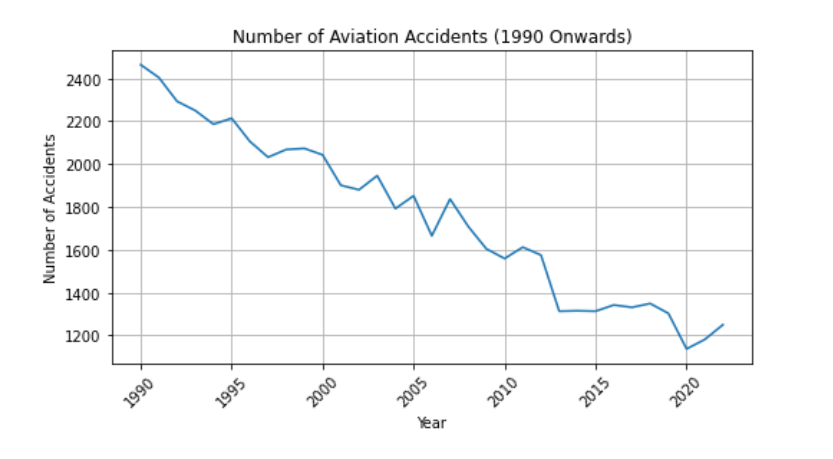

## Data Preparation

### Data Cleaning

We performed the following steps to clean our data.
1. Drop irrelevant columns
2. Deal with missing values
3. Clean up rows/intra-column clean-up: filter Investigation.Type (now Type) to only accidents, Amateur.Built to only include non-amateur aircraft, (*maybe*) Number.of.Engine to only 1 & 2, and other stuff
4. Drop more irrelevant columns if necessary
5. Replace all null values in passenger numbers with 0 (assumption here is that all nulls are 0s that were not manually entered into data)
6. Clean up duplicates in the Make and Model columns

In [ ]:
# Dropping all irrelevant columns
irrelevant_columns = ['Event.Id', 'Accident.Number', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 
'Registration.Number', 'FAR.Description', 'Purpose.of.flight', 'Air.carrier', 'Report.Status', 'Publication.Date']

df = df_original.drop(columns=irrelevant_columns)
df.columns

In [ ]:
# Further pruning of columns with more than 25% of its data missing
df = df.drop(columns=['Schedule', 'Broad.phase.of.flight'])

In [ ]:
# Renaming columns
new_column_names = {'Investigation.Type': 'Type', 'Event.Date': 'Date', 'Injury.Severity': 'Injury_Severity', 'Aircraft.damage': 'Damage_Type', 
'Number.of.Engines': 'Engines', 'Engine.Type': 'Engine_Type', 'Total.Fatal.Injuries': 'Fatal_Injuries', 'Total.Serious.Injuries': 'Serious_Injuries', 
'Total.Minor.Injuries': 'Minor_Injuries', 'Total.Uninjured': 'Uninjured', 'Weather.Condition': 'Weather', 'Amateur.Built': 'Amateur_Built',
'Aircraft.Category': 'Aircraft_Category'}
df.rename(columns=new_column_names, inplace=True)

In [ ]:
# Replacing missing values with 0
df['Fatal_Injuries'] = df['Fatal_Injuries'].replace({np.nan: 0})
df['Serious_Injuries'] = df['Serious_Injuries'].replace({np.nan: 0})
df['Minor_Injuries'] = df['Minor_Injuries'].replace({np.nan: 0})
df['Uninjured'] = df['Uninjured'].replace({np.nan: 0})

In [ ]:
# Dropping Null values
df.dropna(subset=['Make'], inplace=True)
df.dropna(subset=['Model'], inplace=True)
df.dropna(subset=['Amateur_Built'], inplace=True)
df.dropna(subset=['Country'], inplace=True)

In [ ]:
# Getting rid of all events labeled 'Incident'
df = df.loc[df['Type'] == 'Accident']

In [ ]:
# Eliminating all amateur built planes, we ain't interesting in those
df = df.loc[df['Amateur_Built'] == 'No']

In [ ]:
# Drop all rows that aren't airplanes
df = df.loc[df['Aircraft_Category'] == 'Airplane']

### Feature engineering

In [ ]:
# Creating a Total_Passengers column
df['Total_Passengers'] = df['Fatal_Injuries'] + df['Serious_Injuries'] + df['Minor_Injuries'] + df['Uninjured']

In [ ]:
# Creating columns for the fraction of each injury type relative to total passengers
df['Fatal_Injuries_Fraction'] = df['Fatal_Injuries'] / df['Total_Passengers']
df['Serious_Injuries_Fraction'] = df['Serious_Injuries'] / df['Total_Passengers']
df['Minor_Injuries_Fraction'] = df['Minor_Injuries'] / df['Total_Passengers']
df['Uninjured_Fraction'] = df['Uninjured'] / df['Total_Passengers']

In [ ]:
w1 = 0.6 # Fatal injuries are weighted heaviest
w2 = 0.3 # Serious injuries are weighted less than fatal injuries
w3 = 0.1 # Minor injuries are weighted the least

df['Risk_Index'] = (w1 * df['Fatal_Injuries_Fraction']) + (w2 * df['Serious_Injuries_Fraction']) + (w3 * df['Minor_Injuries_Fraction'])

In [ ]:
# Creating a column for plane size
sizewise = [
    df['Total_Passengers'] < 100,
    (df['Total_Passengers'] >= 100) & (df['Total_Passengers'] <= 249),
    df['Total_Passengers'] >= 250
]

choices = ['Small', 'Medium', 'Large']

df['Plane_Size'] = np.select(sizewise, choices, default='unknown')

In [ ]:
# Creating a Make and Model column
df['Make_and_Model'] = df['Make'] + ' ' + df['Model']

In [ ]:
# Creating Mean Risk Index for each plane model
model_mean_risk_index = df.groupby('Make_and_Model')['Risk_Index'].mean()
# Add column mean_risk_index to df
df = df.join(model_mean_risk_index, on='Make_and_Model', rsuffix='_mean')

# Total number of accidents for each model
model_total_accidents = df['Make_and_Model'].value_counts()
# Add column model_total_accidents to df
df = df.join(model_total_accidents, on='Make_and_Model', rsuffix='_total')

In [ ]:
df.rename(columns={'Risk_Index_mean': 'Mean_Risk_Index', 'count': 'Model_Total_Accidents'}, inplace=True)

## Cleaned Dataset

The cleaned data is filtered down to US-only accident data from 1990 to 2022. Null values in columns relevant to our analysis have been removed. The original dataset of 88889 entries has been condensed down to 37461 entries. See Dataclean.ipynb, stringcleaning.ipynb, and EDA.ipynb for more details on how the data was cleaned. The dataset is now ready for analysis.

In [9]:
df_cleaned = pd.read_csv('../CSVs/data_cleaned_final.csv')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37461 entries, 0 to 37460
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       37461 non-null  object 
 1   Year                       37461 non-null  int64  
 2   Month                      37461 non-null  int64  
 3   Location                   37459 non-null  object 
 4   Country                    37461 non-null  object 
 5   Injury_Severity            37461 non-null  object 
 6   Damage_Type                37461 non-null  object 
 7   Aircraft_Category          37461 non-null  object 
 8   Make                       37461 non-null  object 
 9   Model                      37461 non-null  object 
 10  Engines                    37461 non-null  float64
 11  Engine_Type                36420 non-null  object 
 12  Fatal_Injuries             37461 non-null  float64
 13  Serious_Injuries           37461 non-null  flo

## Analysis

To visualize the effectiveness of our risk index metric, we plot it against fatality rates to show the correlation between the two.

In [ ]:
# Group by Make_and_Model to get average Risk Index and severity (Fatal Injuries Fraction)
risk_vs_severity = df.groupby('Make_and_Model').agg({
    'Risk_Index': 'mean',
    'Fatal_Injuries_Fraction': 'mean'
})

# Plot as a scatter plot with Risk Index vs. Fatal Injuries
plt.figure(figsize=(10, 6))
plt.scatter(risk_vs_severity['Risk_Index'], risk_vs_severity['Fatal_Injuries_Fraction'], alpha=0.5, color='blue')

plt.title('Risk Index vs. Fatal Injuries')
plt.xlabel('Mean Risk Index')
plt.ylabel('Mean Fatal Injuries Fraction')
plt.tight_layout()
plt.show()

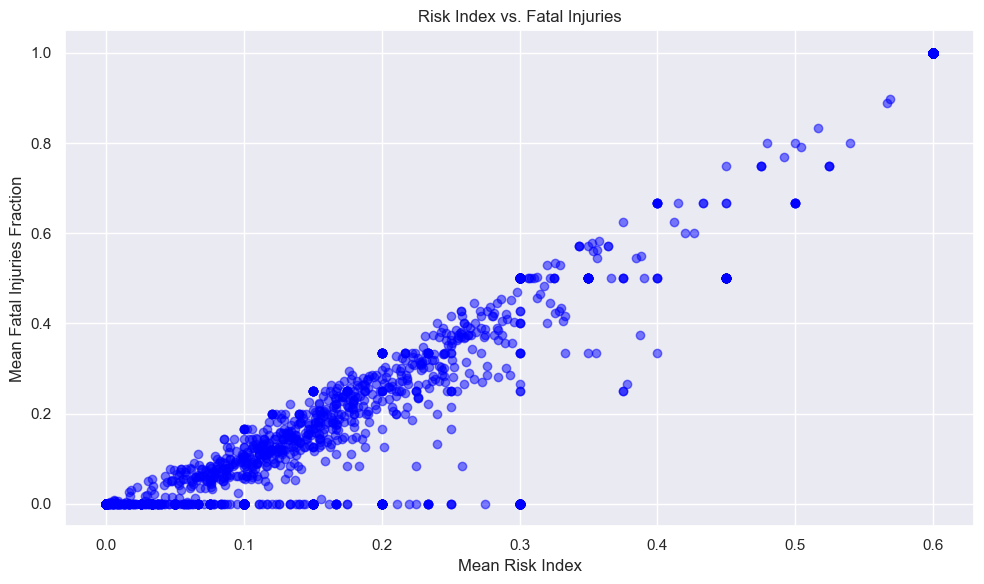

In [ ]:
# Making a separate table to drill down into the safest planes question
df_make_model = df.groupby(['Make', 'Model'])[['Mean_Risk_Index', 'Model_Total_Accidents']].mean()
df_make_model = df_make_model.join(df.groupby(['Make', 'Model'])['Plane_Size'].first())
df_make_model.to_csv('make_model_risk.csv')

### Top 10 Safest Airplanes

The safest airplanes are the 10 models with the lowest mean risk index. 

In [ ]:
df_safest = pd.read_csv('make_model_risk.csv')
df_safest.info()

# Shrinking the dataset down to airplanes with more than 100 entries
df_safest = df_safest.loc[df_safest['Model_Total_Accidents'] > 100]

# Sort df_safest by Mean_Risk_Index in ascending order
df_safest = df_safest.sort_values('Mean_Risk_Index', ascending=True)

df_safest['Make_and_Model'] = df_safest['Make'] + ' ' + df_safest['Model']

In [ ]:
# Filtering df by the ten safest planes
top_ten = df_safest[:10]['Make_and_Model'].tolist()

filtered_df = df[df['Make_and_Model'].isin(top_ten)]

filtered_df.sort_values(by='Mean_Risk_Index', ascending=True, inplace=True)

In [ ]:
# Plotting the mean risk index for the ten safest planes
plt.figure(figsize=(10, 6))
sns.barplot(x='Make_and_Model', y='Risk_Index', data=filtered_df, errorbar=('ci', 95), capsize=0.1, palette='mako_r')
plt.xlabel('Make & Model', fontsize=12)
plt.ylabel('Mean Risk Index', fontsize=12)
plt.title('The 10 Safest Planes', fontsize=16)

plt.xticks(rotation=45, ha='right')
sns.set(style="darkgrid")

plt.tight_layout()
plt.savefig('Images/mean_risk_index_safest_planes.png')
plt.show()

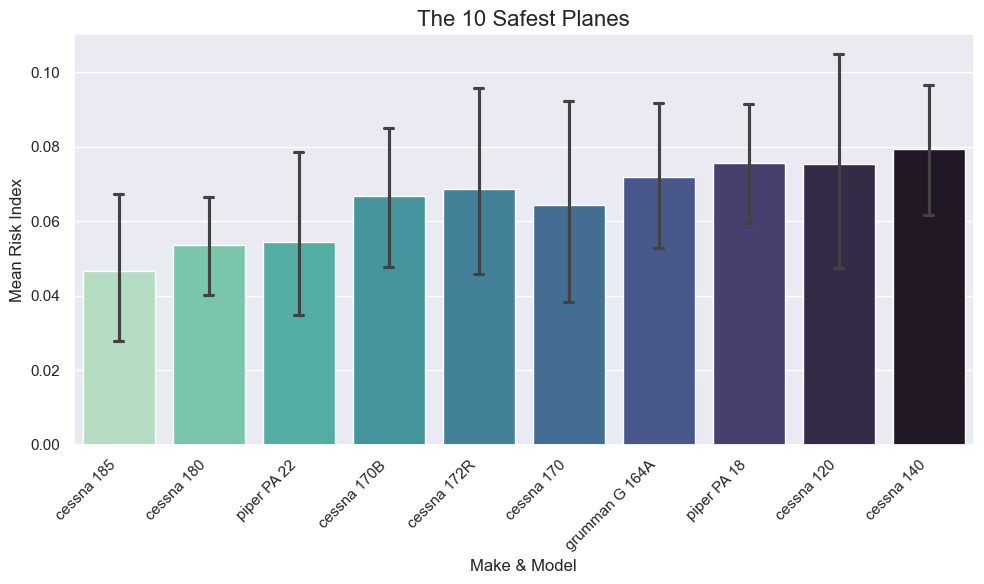

In [ ]:
# Plotting a heatmap showing the distribution of injuries for the ten safest planes
columns_of_interest = ['Make_and_Model', 'Fatal_Injuries', 'Serious_Injuries', 'Minor_Injuries']

# Filter the DataFrame for these columns
filtered_df_heatmap = filtered_df[columns_of_interest]

# Create a pivot table that sums the injury metrics for each Make_and_Model
pivot_table = filtered_df_heatmap.pivot_table(index='Make_and_Model', 
                                              values=['Fatal_Injuries', 'Serious_Injuries', 'Minor_Injuries'], 
                                              aggfunc='sum')

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding title and labels
plt.title('Heatmap of Injuries for Top Ten Make and Model Aircraft')
plt.xlabel('Injury Type')
plt.ylabel('Make and Model')

# Display the heatmap
plt.show()

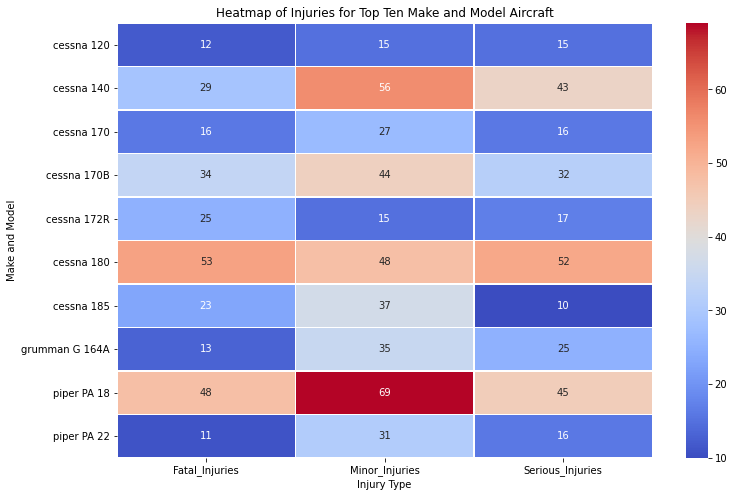

## Conclusions

When we compare the risk index values of each plane with their respective accident reports, the empirical decision on what makes a safe plane becomes slightly harder. We believe in order to come up with a discrete and less nebulous answer is to determine a Cost/Risk analysis based on how much capital it would take to operate and maintain these planes over the predicted risks that come along with said models.